# 

# Intro à Scikit-Learn

From:

* [VanderPlas, Jake. 2017. Python Data Science Handbook. O’Reilly Media, Inc.](https://github.com/jakevdp/PythonDataScienceHandbook)
* [Scikit-Learn datasets: The Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

## Régression

### Données

https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-dataset


Descripteurs (features) :

* `CRIM`: taux de criminalité par habitant par ville
* `ZN`: proportion de terrains résidentiels zonés pour les lots de plus de 25 000 pi.ca.
* `INDUS`: proportion d'acres commerciaux/non-commerciaux par ville
* `CHAS`: variable fictive de Charles River (= 1 si la zone délimite la rivière; 0 sinon)
* `NOX`: concentration d'oxydes nitriques (parties par 10 millions)
* `RM`: nombre moyen de pièces par logement
* `AGE`: proportion de logements occupés par leur propriétaire construits avant 1940
* `DIS`: distances pondérées des cinq centres d'emploi de Boston
* `RAD`: indice d'accessibilité aux autoroutes radiales
* `TAX`: taux d'imposition foncière de la valeur totale par tranche de 10 000 $
* `PTRATIO`: ratio élèves-enseignant par ville
* `B`: 1000(A - 0.63)^2 où A est la proportion d'habitants afro-américains par ville
* `LSTAT`: pourcentage d'habitant en dessous du seuil de pauvreté

Cible (target) :

* `MEDV`: Valeur médiane des logements occupés par leur propriétaire en 1 000 $

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

%config InlineBackend.figure_format='retina'  # For high DPI display

#### Chargement des données

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [3]:
type(boston)

sklearn.utils.Bunch

In [4]:
from sklearn.utils import Bunch

# Bunch?

In [5]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [6]:
type(boston.data)


numpy.ndarray

In [7]:
print(boston.data.shape, boston.target.shape)

(506, 13) (506,)


In [8]:
boston.feature_names
boston.feature_names[0]

'CRIM'

#### Sélection des données d'apprentissage

In [9]:
FT_NAME = "LSTAT"

idx = list(boston.feature_names).index(FT_NAME)
idx

12

Ajout d'une dimension (`np.newaxis`) lorsqu'un seul descripteur est sélectionné, pour maintenir le format en colonne(s).

In [10]:
boston.data[:, np.newaxis, 12].shape

(506, 1)

In [11]:
# ou
boston.data[:, idx].reshape(-1, 1).shape


(506, 1)

In [12]:
xs_1d = boston.data[:, idx].reshape(-1, 1)
print(xs_1d.shape)

ys = boston.target
print(ys.shape)

(506, 1)
(506,)


Disposition attendue des descripteurs (*features*) et des valeurs cibles (*labels*):

![](img/05.02-samples-features.png)

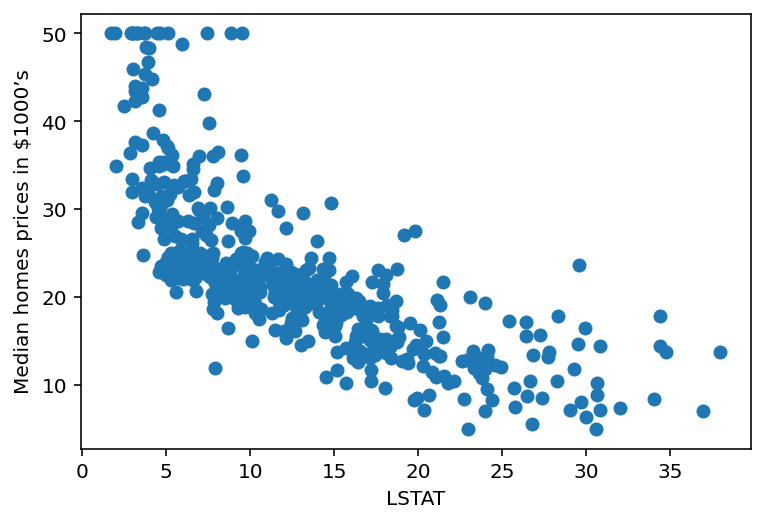

In [13]:
plt.scatter(xs_1d[:, -1], ys)
plt.xlabel(FT_NAME)
plt.ylabel("Median homes prices in $1000’s")
plt.show()

##### Échantillonnage aléatoire des données d'entrainement et de test

In [14]:
from sklearn.model_selection import train_test_split

xs_train, xs_test, ys_train, ys_test = train_test_split(
    xs_1d, ys, random_state=1
)

### Entrainement

In [15]:
# 1. Choix du modèle (classe)
from sklearn.linear_model import LinearRegression

# 2. Instantiaiton
model_1d = LinearRegression()

# 3.  Apprentissage (fit) du model
model_1d.fit(xs_train, ys_train)

# 4. predict on new data
ys_pred = model_1d.predict(xs_test)

### Résultats

#### Graphiques

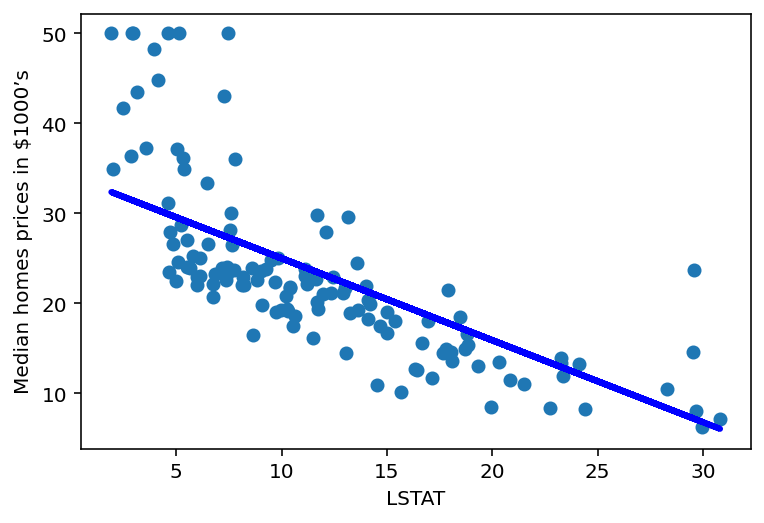

In [16]:
# Plot outputs
plt.scatter(xs_test[:, -1], ys_test)
plt.plot(xs_test[:, -1], ys_pred, color="blue", linewidth=3)
plt.xlabel(FT_NAME)
plt.ylabel("Median homes prices in $1000’s")
plt.show()

#### Évaluations

* [Mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)
* [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(ys_test, ys_pred)
r2 = r2_score(ys_test, ys_pred)

print(f"MSE = {mse:.2f}")
print(f"R^2 = {r2:.4f}")

MSE = 46.29
R^2 = 0.5327


### Cas non-linéaires

* Astuce: adapter la régression linéaire en transformant les données selon des fonctions de base
* Par exemple avec une projection polynomiale:
    $$\hat{y} = a_0 + a_1 x + a_2 x^2 + \cdots + a_n x^n$$
* Notez qu'il s'agit toujours d'un modèle linéaire
* Il est linéaire dans le sens où on ne multiplie ou ne divise jamais les coefficients
* Le descripteur unidimensionnel $x$ est projeté dans une ou plusieurs dimensions pour permettre de modéliser des relations plus complexes entre $x$ et $y$

In [18]:
print(xs_1d.shape)
xs_b = np.hstack([xs_1d, xs_1d ** 2])
print(xs_b.shape)

(506, 1)
(506, 2)


In [19]:
def apply_poly_basis(arr, deg=2):
    """
    >>> arr = np.arange(1., 4.).reshape(-1, 1)
    >>> arr   # Format expected by sklearn
    array([[1.],
           [2.],
           [3.]])
    >>> apply_poly_basis(arr, deg=3)
    array([[ 1.,  1.,  1.],
           [ 2.,  4.,  8.],
           [ 3.,  9., 27.]])
    """
    assert arr.ndim == 2

    arrs = [arr ** n for n in range(1, deg + 1)]

    return np.hstack(arrs)

In [20]:
DEG = 2

xs_train_b = apply_poly_basis(xs_train, deg=DEG)
xs_test_b = apply_poly_basis(xs_test, deg=DEG)
xs_test_b.shape

(127, 2)

In [21]:
# 1. Choix du modèle (classe)
from sklearn.linear_model import LinearRegression

# 2. Instantiaiton
model_b = LinearRegression()

# 3.  Apprentissage (fit) du model
model_b.fit(xs_train_b, ys_train)

# 4. predict on new data
ys_pred_b = model_b.predict(xs_test_b)

#### Graphiques

Construction d'une `array` à valeurs croissantes qui s'étendent des bornes inférieure et supérieure des données pour produire le résultat de la régression sur le graphique.

In [22]:
def plot_regression_line(xs, model, hop, deg=None):
    # Les valeurs limites de la 1re colonne des descripteurs
    x_min, x_max = xs[:, 0].min(), xs[:, 0].max()

    # L'array qui s'étend sur l'amplitude de valeurs des données (de pas HOP)
    xx = np.arange(x_min, x_max, hop).reshape(-1, 1)

    # Regénération éventuelle de la base polynomiale
    if deg is not None:
        xx = apply_poly_basis(xx, deg=deg)

    # Prédiction à l'aide du modèle pour produire la ligne de régression à tracer
    yy_pred = model.predict(xx)

    plt.plot(xx[:, 0], yy_pred, color="blue", linewidth=3)

In [23]:
HOP = 0.1

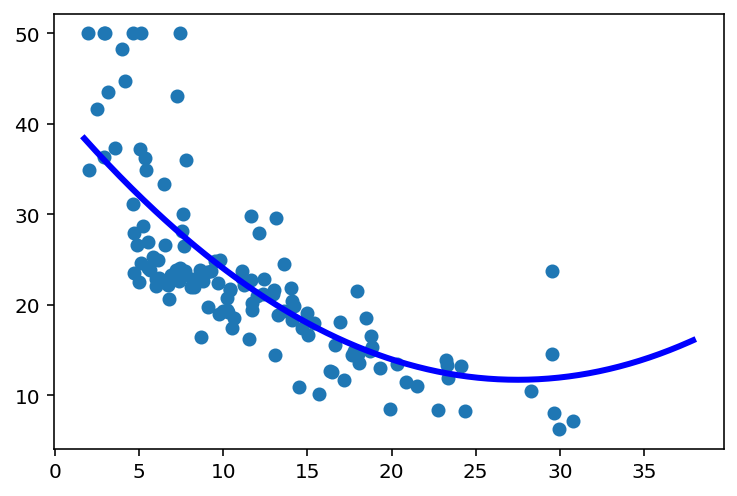

In [24]:
plot_regression_line(xs_train_b, model=model_b, hop=HOP, deg=DEG)
plt.scatter(xs_test_b[:, 0], ys_test)
plt.show()

#### Évaluations

In [25]:
mse = mean_squared_error(ys_test, ys_pred_b)
r2 = r2_score(ys_test, ys_pred_b)

print(f"MSE = {mse:.2f}")
print(f"R^2 = {r2:.4f}")

MSE = 35.98
R^2 = 0.6367


Coefficients $a_1$ et $a_2$ de la régression, provenant de l'équation suivante :

$$\hat{y}^{(i)} = a_0 + a_1 x_1^{(i)} + a_2 x_2^{(i)}$$

In [26]:
print("a_1 = {:.4f}, a_2 = {:.4f}".format(*model_b.coef_))

a_1 = -2.2088, a_2 = 0.0402


## Exercice


#### But : Tentez d'améliorer le résultat de la régression linéaire

* Réalisez de nouveau la régression linéaire en utilisant l'ensemble des 13 descripteurs (*features*) proposé, au lieu d'un seul. La sélection s'opère dès l'étape :
[Sélection des données d'apprentissage](#Sélection-des-données-d'apprentissage)

* Générez d'autres descripteurs en prenant, par exemple, le carré de leurs valeurs, pour prendre en compte la non-linéarité des relations

* Évaluez la performance de la régression en terme de MSE et R^2

* Identifiez les descripteurs qui semblent les plus significatifs pour cette régression, en observant la valeur de leur paramètre respectif ($a_j$ via `model.coef_`)

* Commentez succinctement

* Notez que la visualisation pose problème lorsque que l'on utilise plus d'un descripteur (plus de 2 en particulier), elle n'est donc pas nécessaire pour cet exercice

<span style="color:red">Implémentez votre solution ci-dessous</span>


on va tester pour les autres Features et voir celle qui ont les MSE les plus petit 

	CRIM


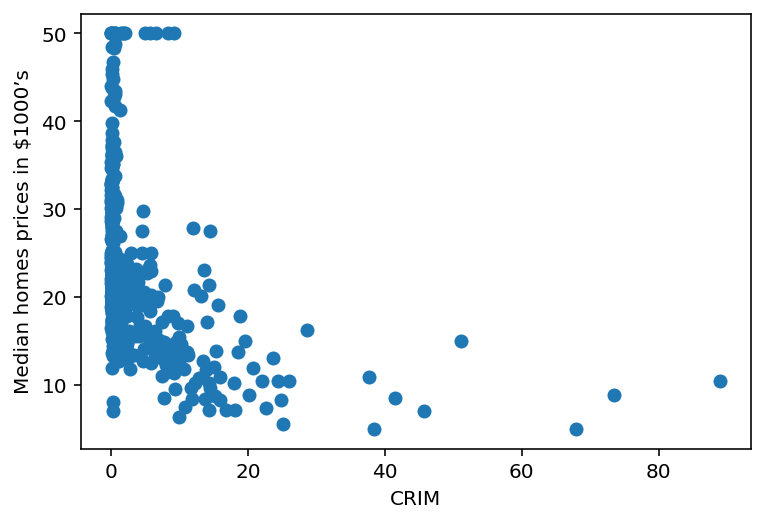

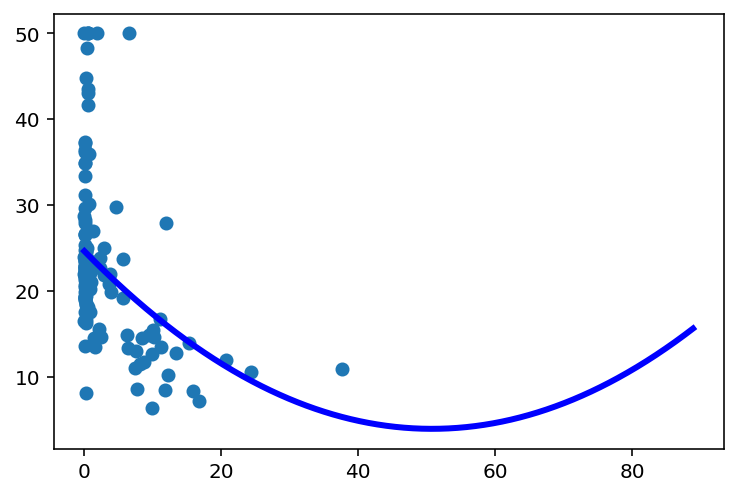

MSE = 79.11
R^2 = 0.2014
	ZN


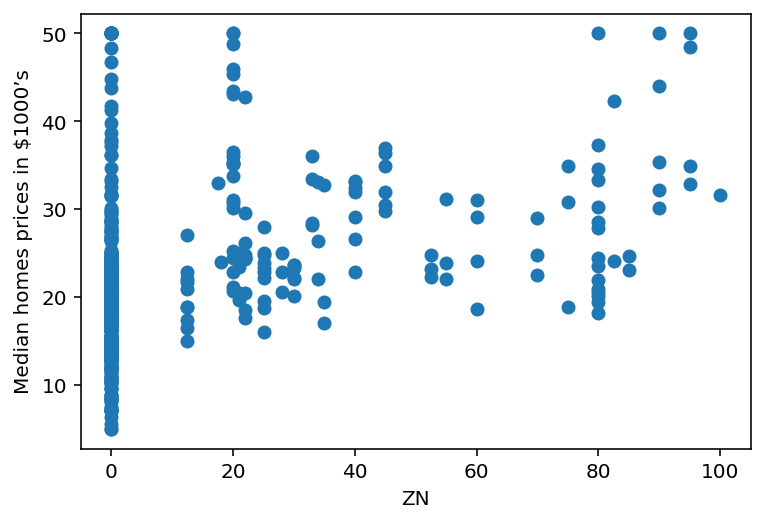

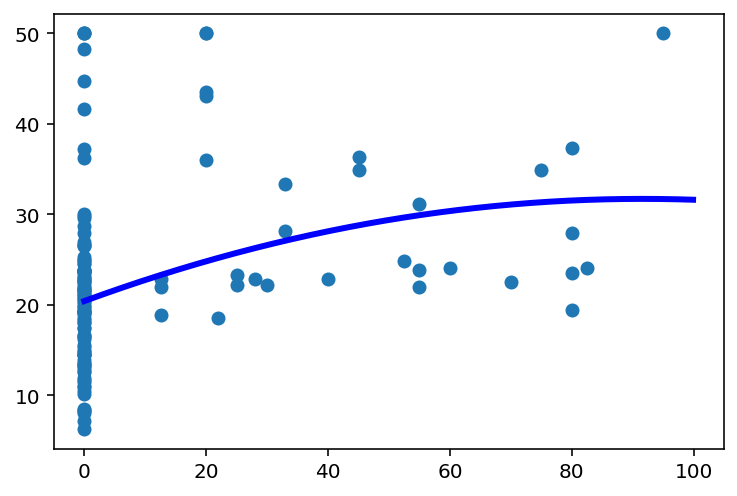

MSE = 89.38
R^2 = 0.0978
	INDUS


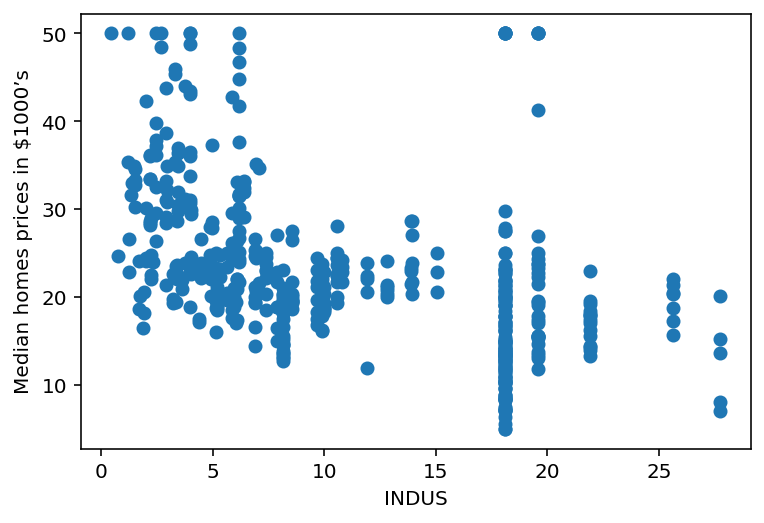

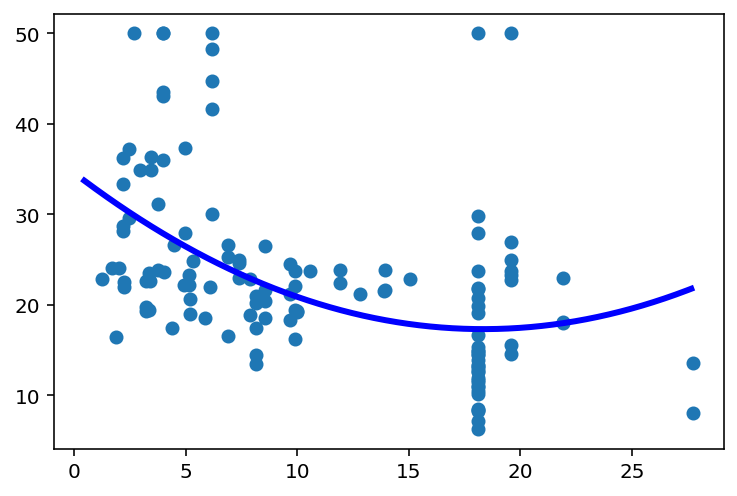

MSE = 77.18
R^2 = 0.2209
	CHAS


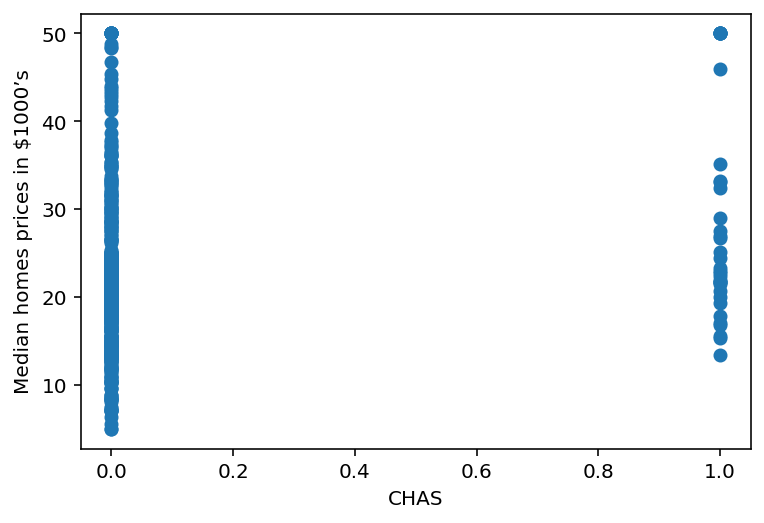

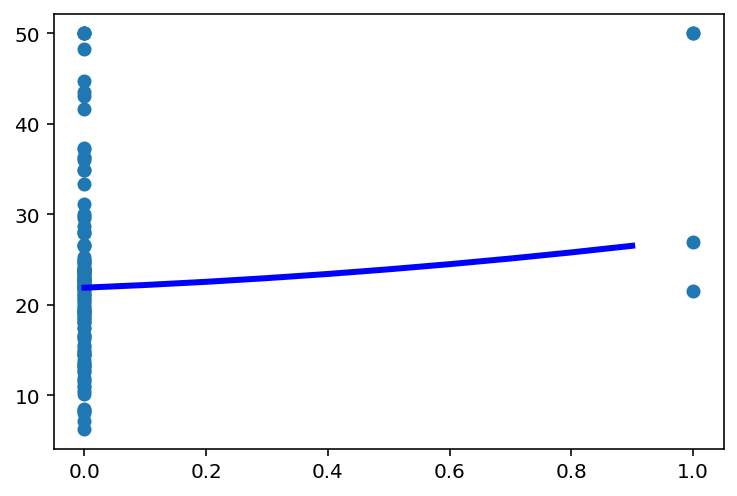

MSE = 96.21
R^2 = 0.0287
	NOX


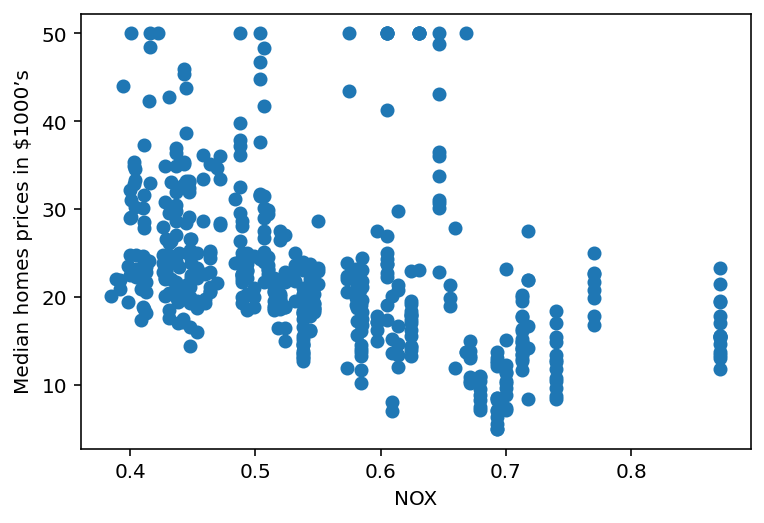

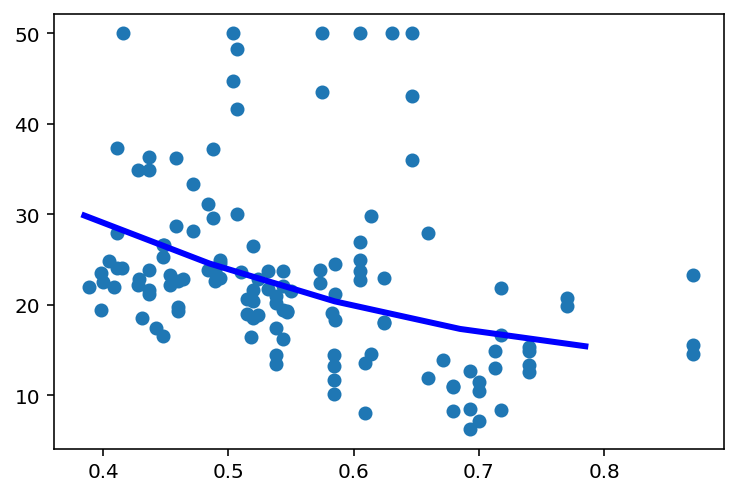

MSE = 89.32
R^2 = 0.0983
	RM


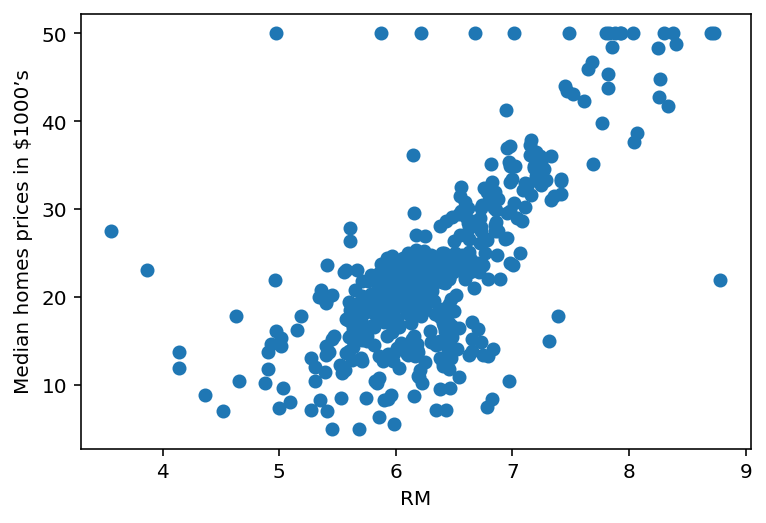

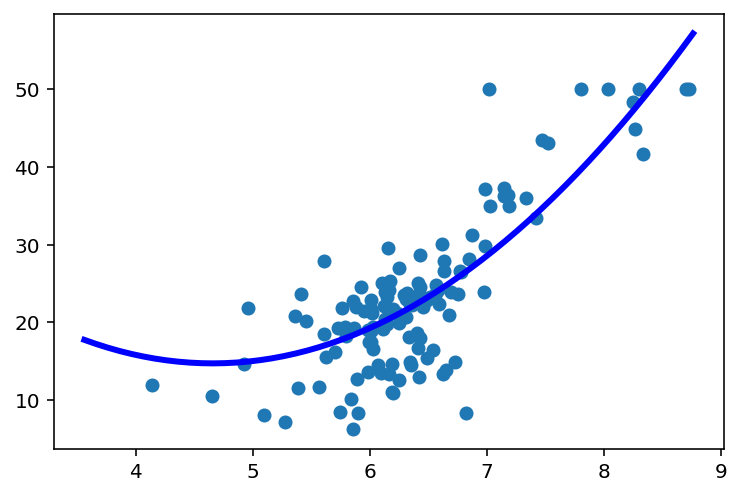

MSE = 32.12
R^2 = 0.6757
	AGE


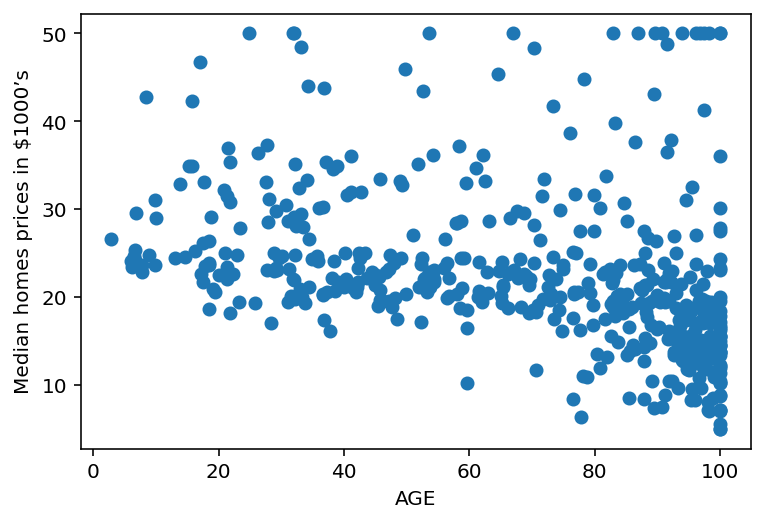

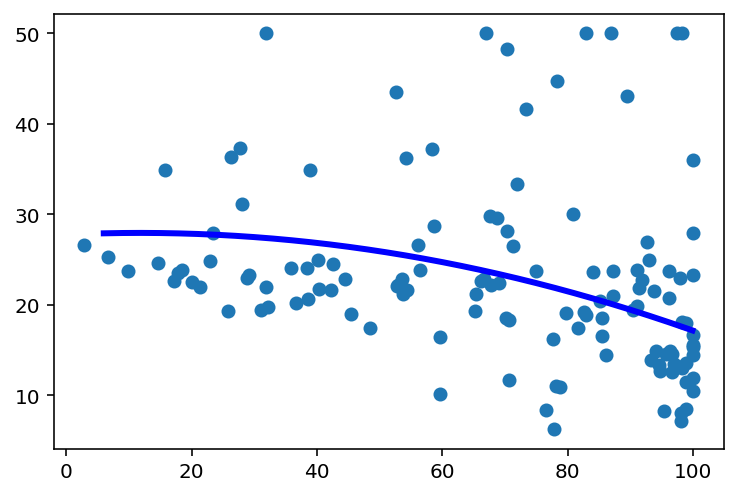

MSE = 93.37
R^2 = 0.0574
	DIS


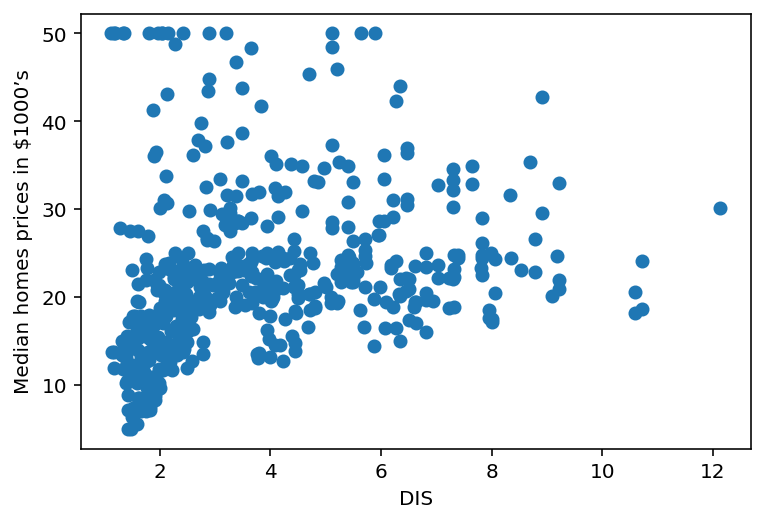

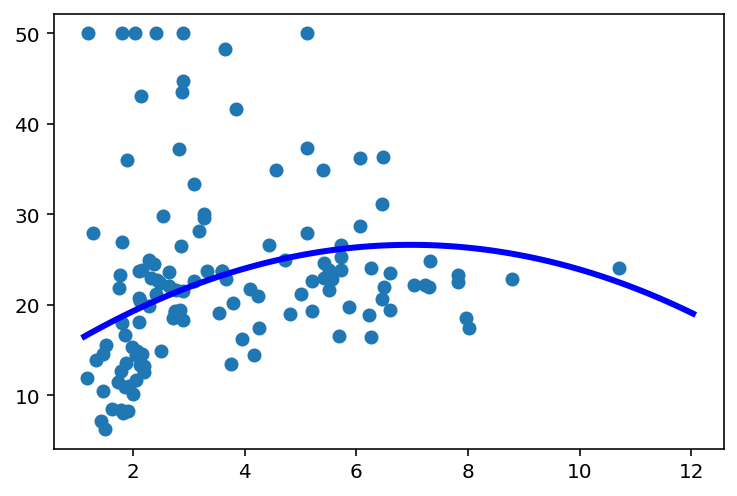

MSE = 96.19
R^2 = 0.0290
	RAD


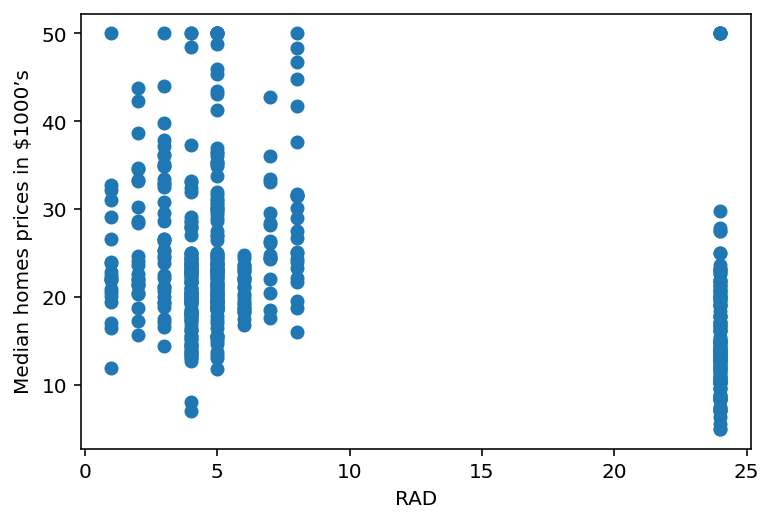

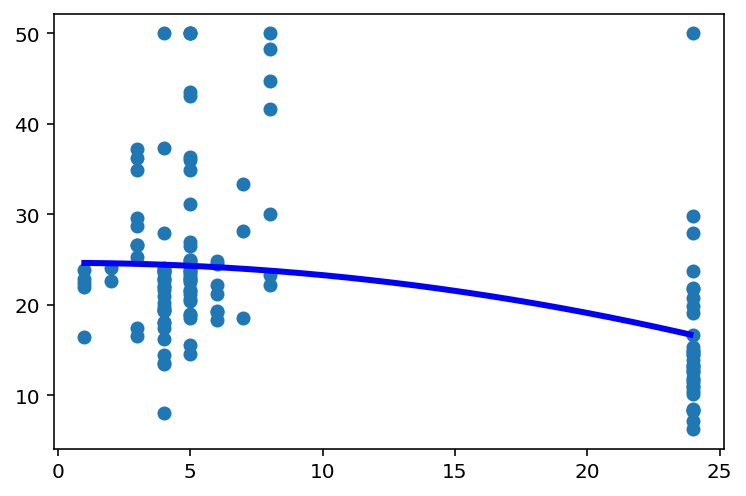

MSE = 82.73
R^2 = 0.1648
	TAX


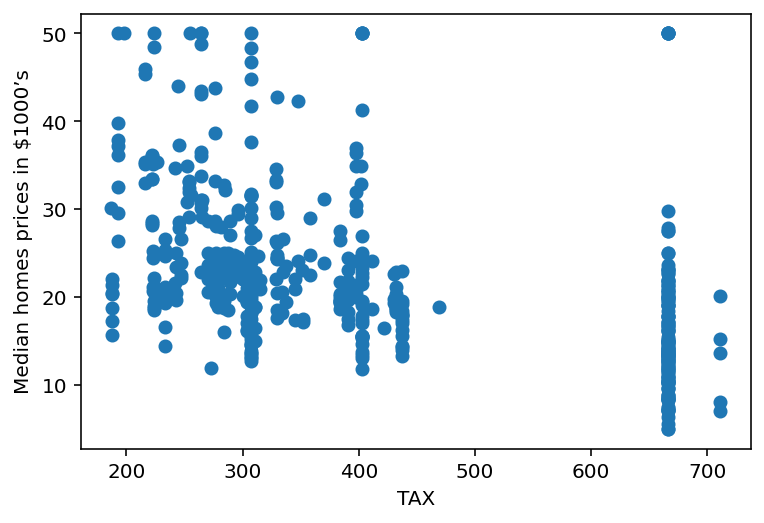

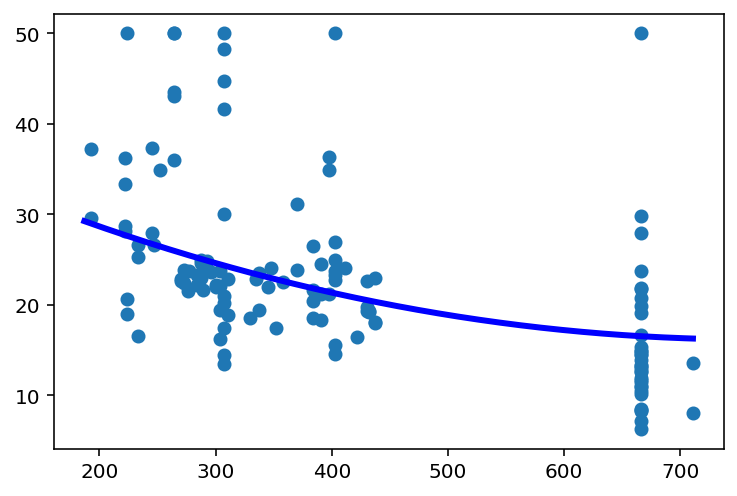

MSE = 74.06
R^2 = 0.2523
	PTRATIO


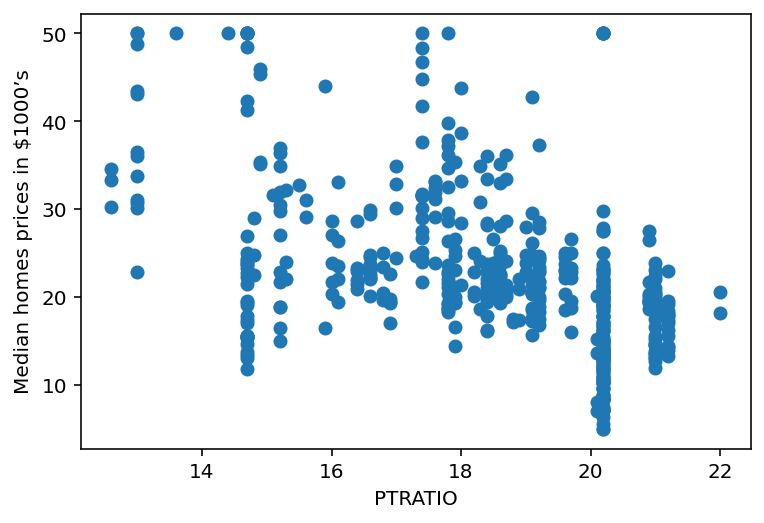

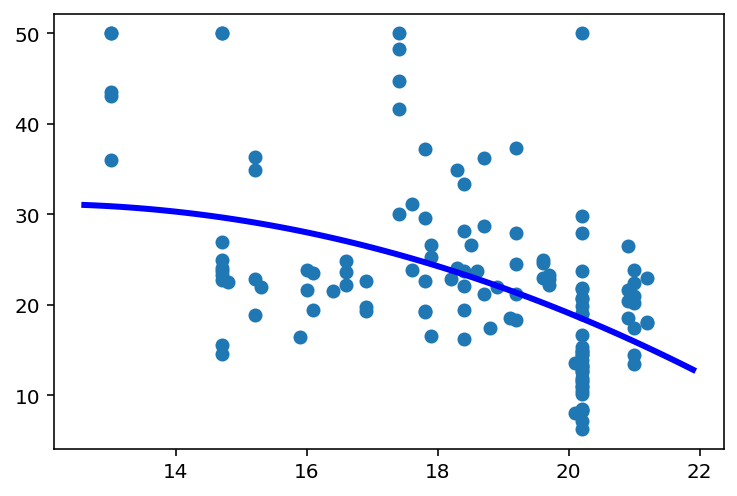

MSE = 74.07
R^2 = 0.2523
	B


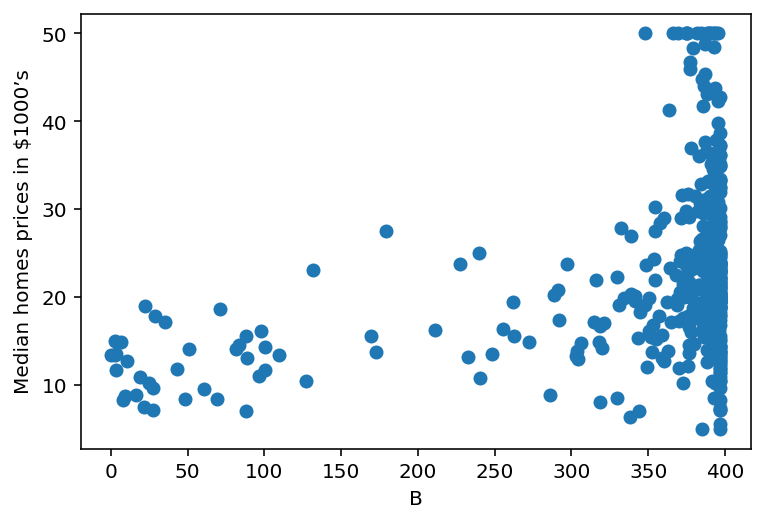

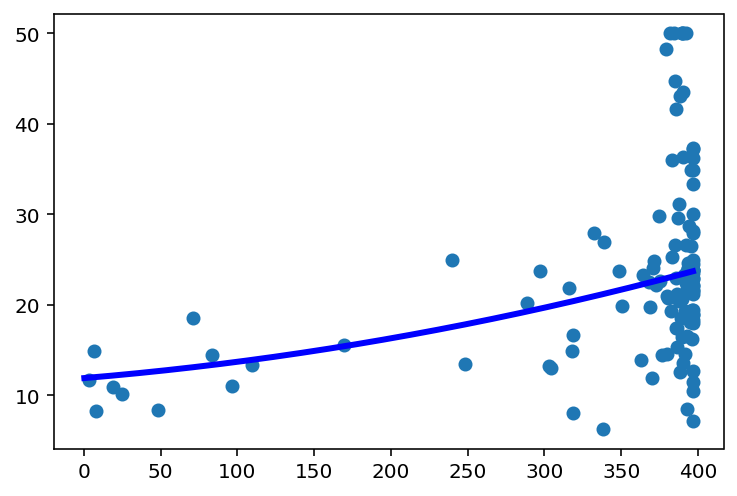

MSE = 86.41
R^2 = 0.1276
	LSTAT


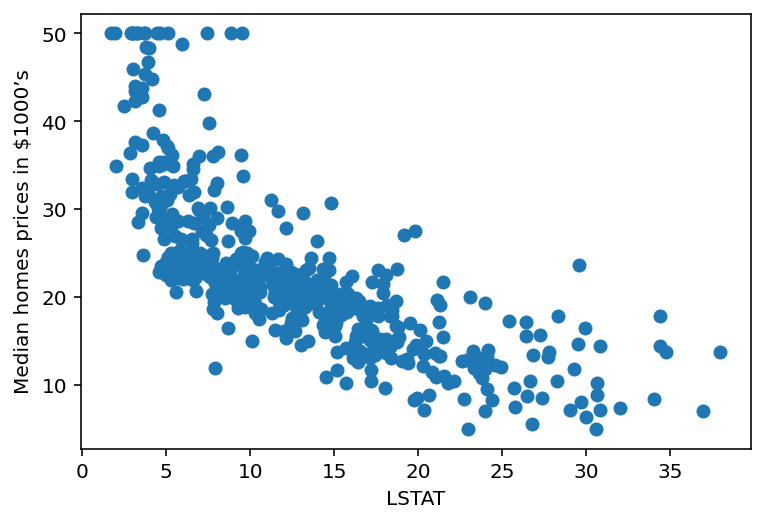

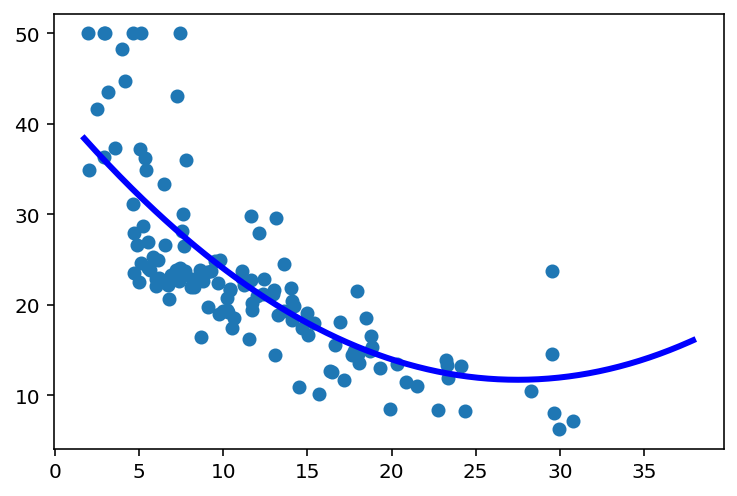

MSE = 35.98
R^2 = 0.6367


In [27]:

ys = boston.target
mse_list=[]
r2_list=[]
for i in range(13):
    print("\t"+boston.feature_names[i])
    xs_1d = boston.data[:, i].reshape(-1, 1)
    plt.scatter(xs_1d[:, -1], ys)
    plt.xlabel(boston.feature_names[i])
    plt.ylabel("Median homes prices in $1000’s")
    plt.show()
    #training data
    xs_train, xs_test, ys_train, ys_test = train_test_split(
    xs_1d, ys, random_state=1)
    xs_train_b = apply_poly_basis(xs_train, deg=DEG)
    xs_test_b = apply_poly_basis(xs_test, deg=DEG)
    # 2. Instantiaiton
    model_b = LinearRegression()

    # 3.  Apprentissage (fit) du model
    model_b.fit(xs_train_b, ys_train)

    # 4. predict on new data
    ys_pred_b = model_b.predict(xs_test_b)

    plot_regression_line(xs_train_b, model=model_b, hop=HOP, deg=DEG)
    plt.scatter(xs_test_b[:, 0], ys_test)
    plt.show()

    mse = mean_squared_error(ys_test, ys_pred_b)
    r2 = r2_score(ys_test, ys_pred_b)

    print(f"MSE = {mse:.2f}")
    print(f"R^2 = {r2:.4f}")
    mse_list.append(mse)
    r2_list.append(r2)


we notice that we have some outlier for some features, therefore, we remove them to improve the precision

	CRIM


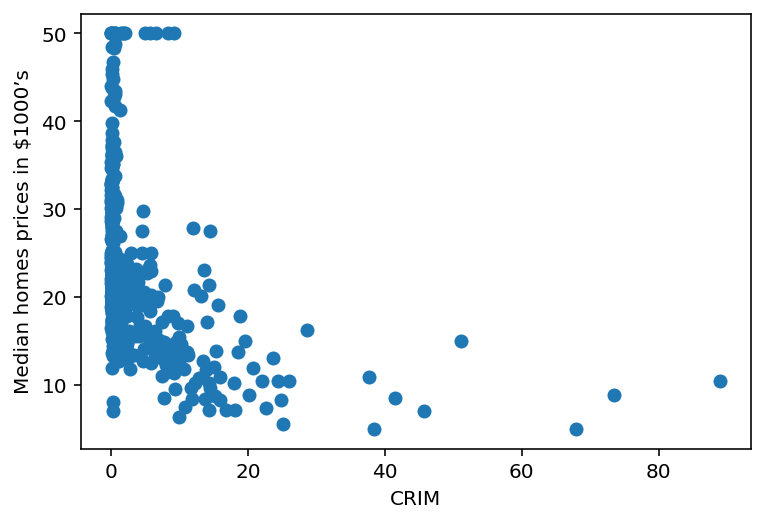

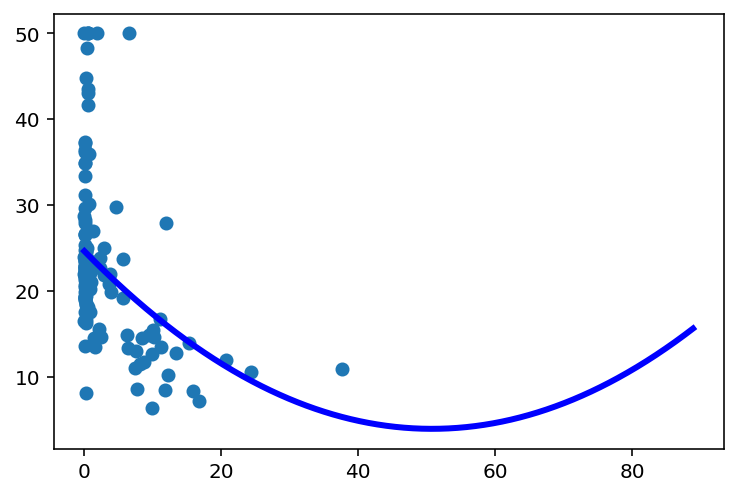

MSE = 79.11
R^2 = 0.2014
	ZN


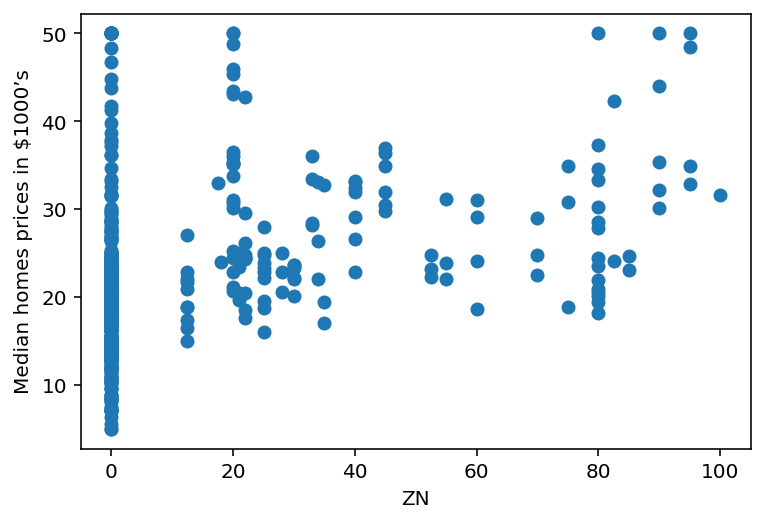

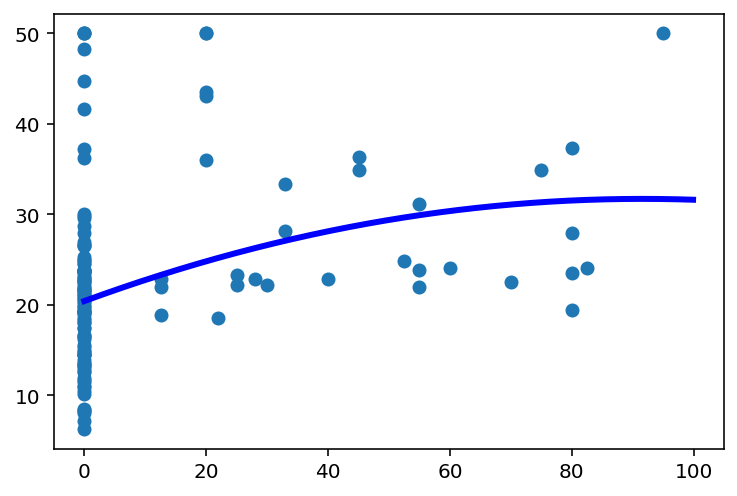

MSE = 89.38
R^2 = 0.0978
	INDUS


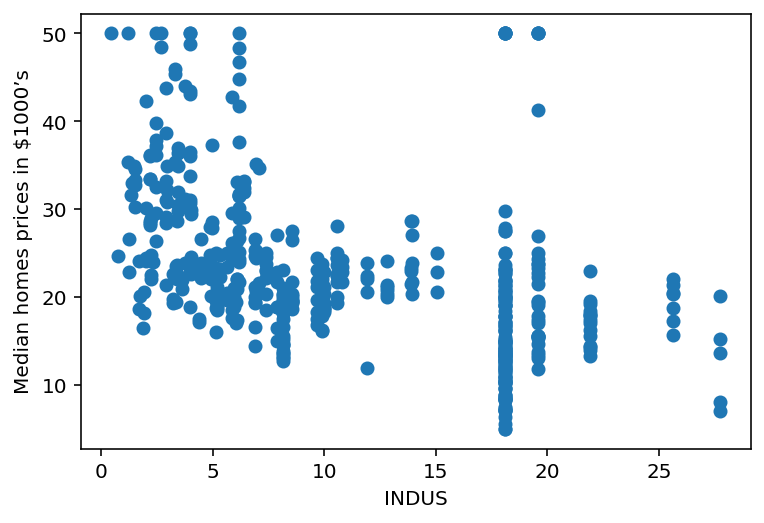

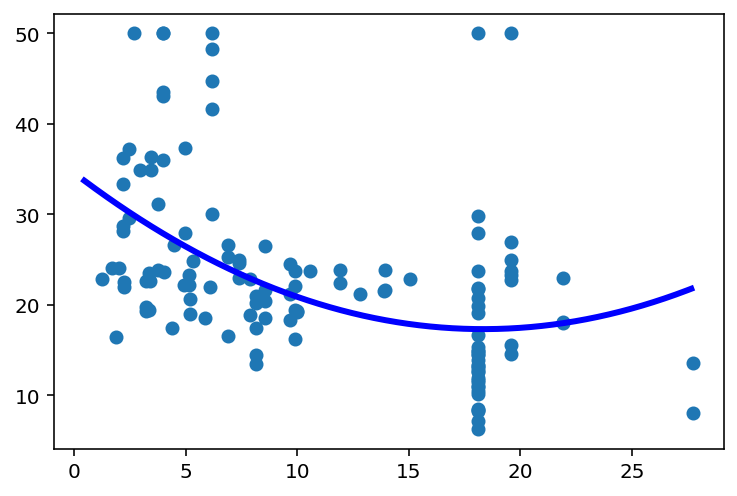

MSE = 77.18
R^2 = 0.2209
	CHAS


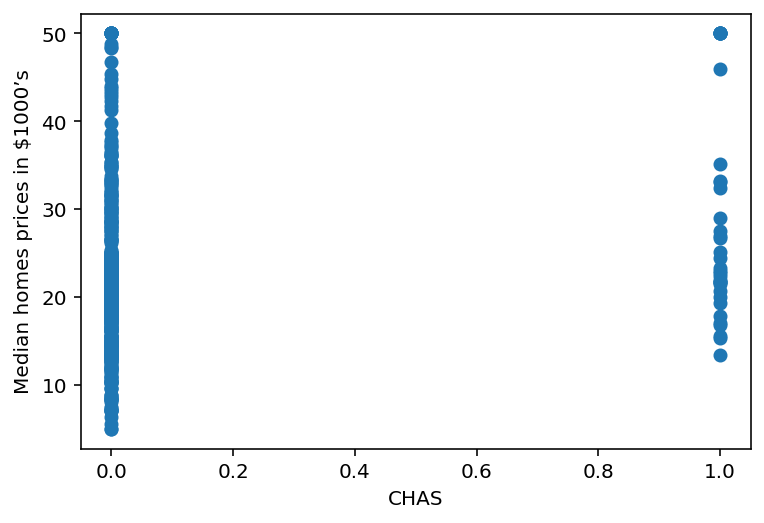

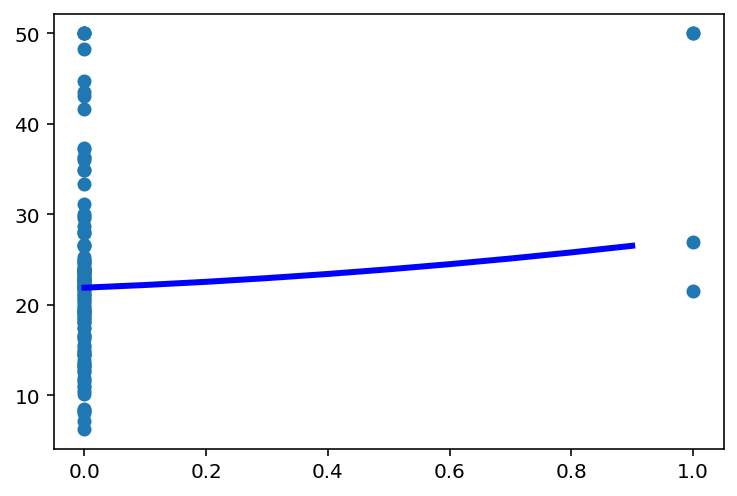

MSE = 96.21
R^2 = 0.0287
	NOX


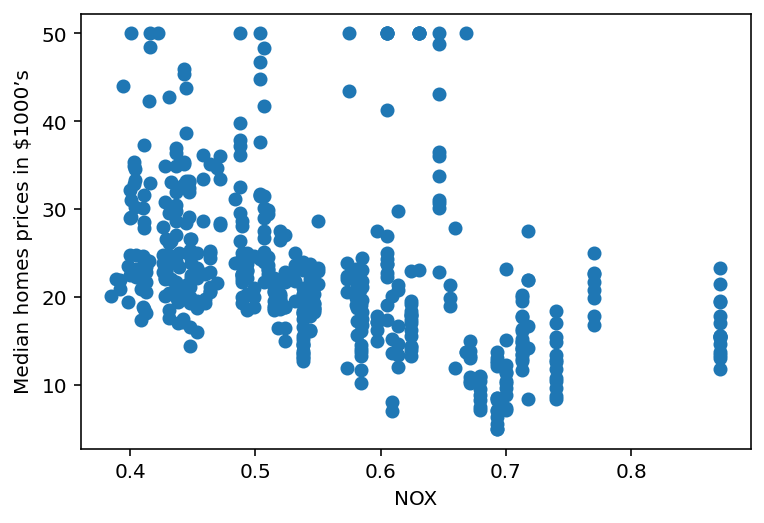

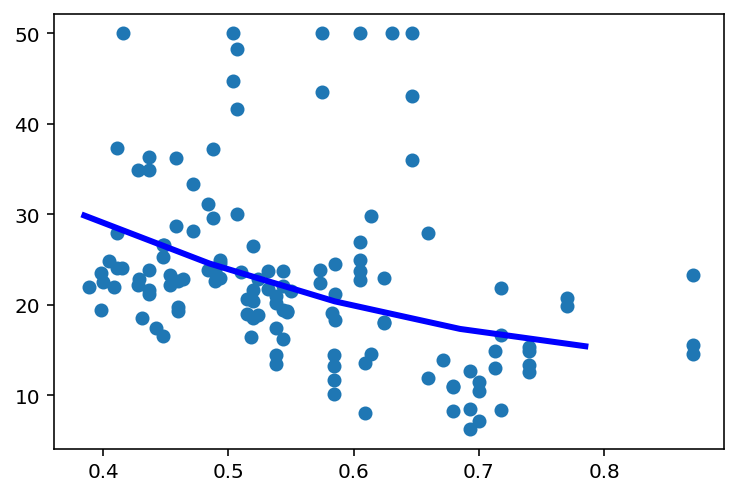

MSE = 89.32
R^2 = 0.0983
	RM


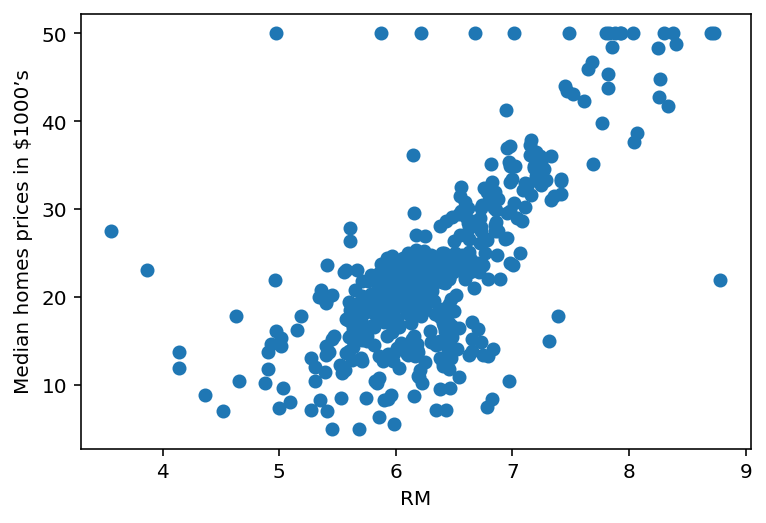

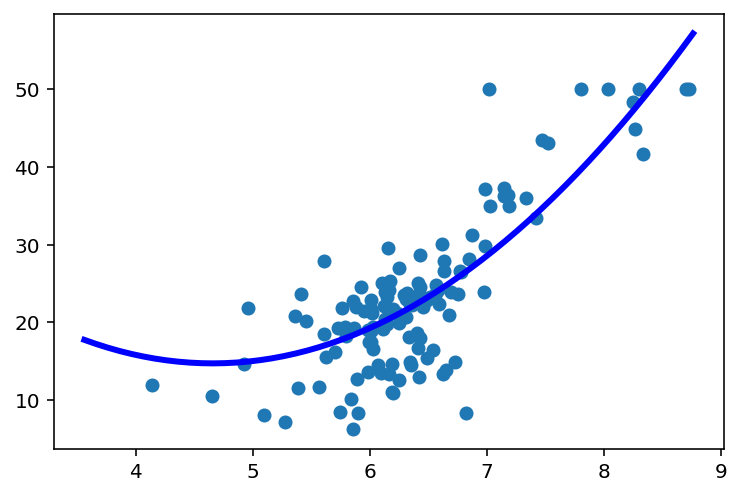

MSE = 32.12
R^2 = 0.6757
	AGE


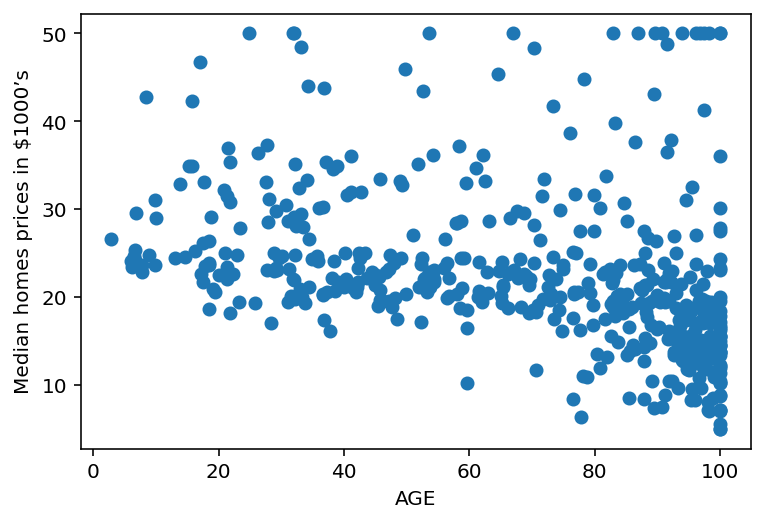

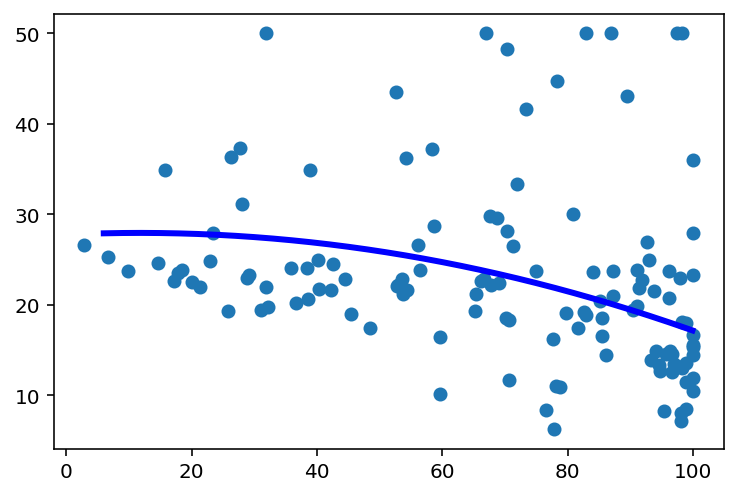

MSE = 93.37
R^2 = 0.0574
	DIS


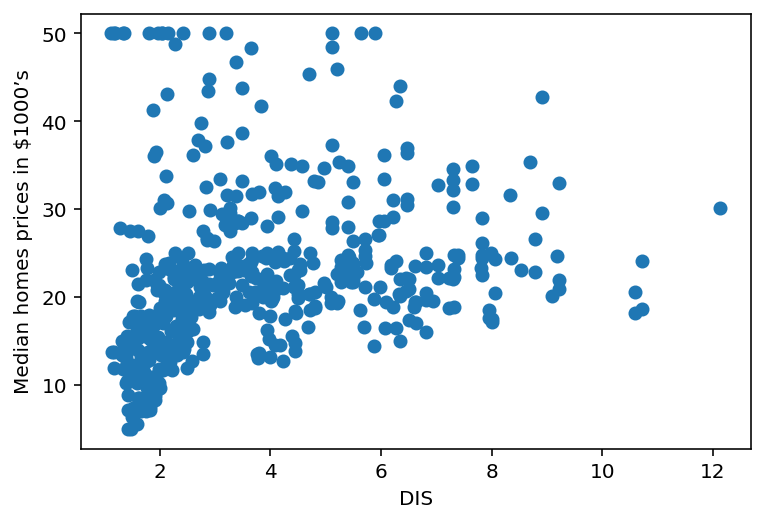

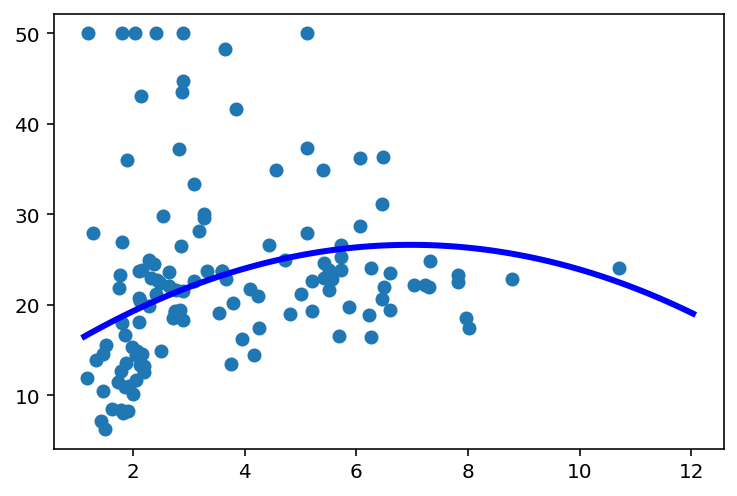

MSE = 96.19
R^2 = 0.0290
	RAD


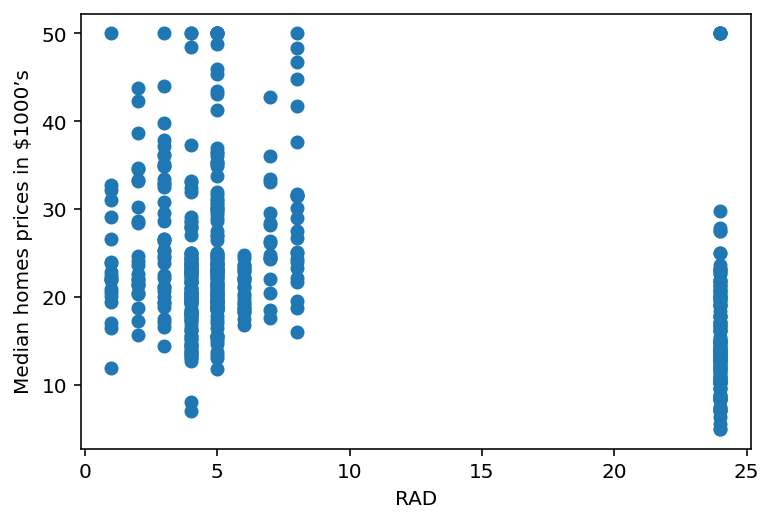

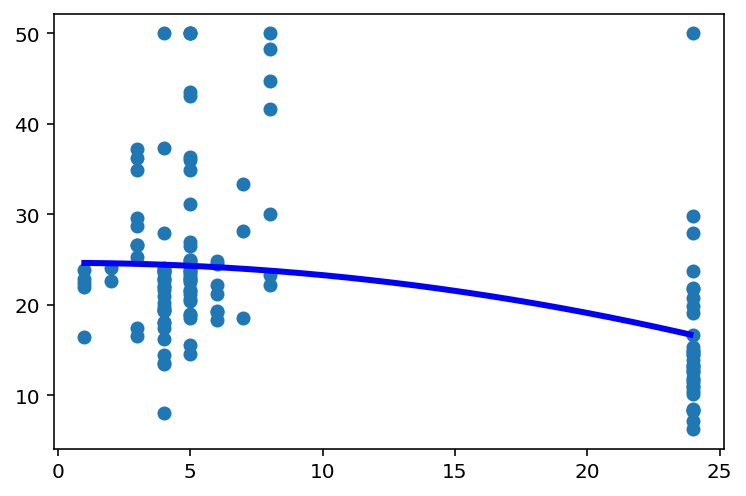

MSE = 82.73
R^2 = 0.1648
	TAX


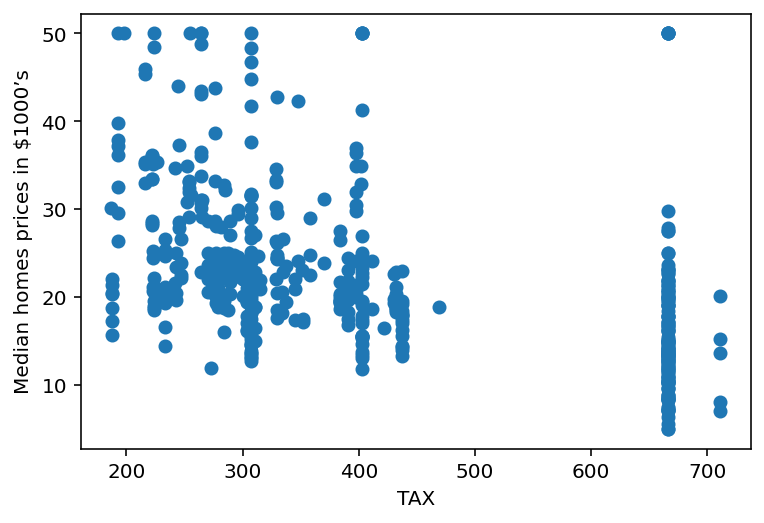

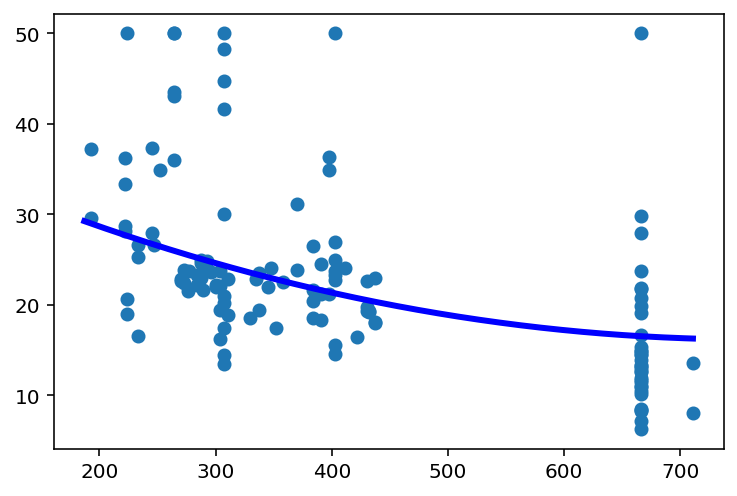

MSE = 74.06
R^2 = 0.2523
	PTRATIO


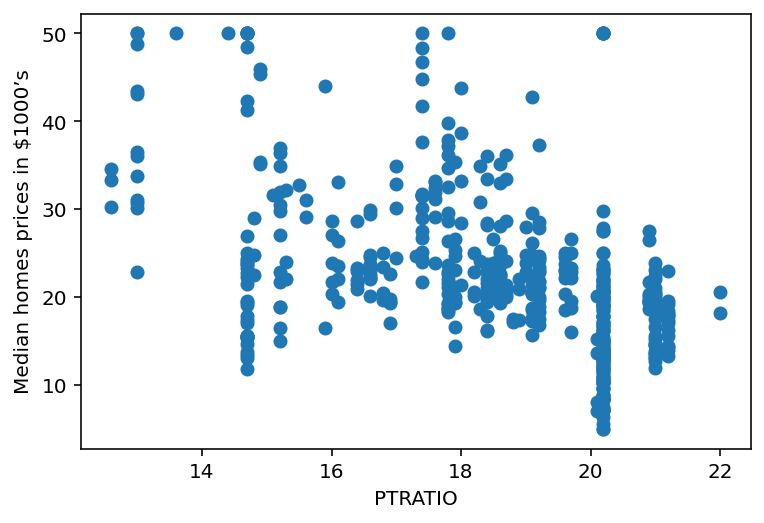

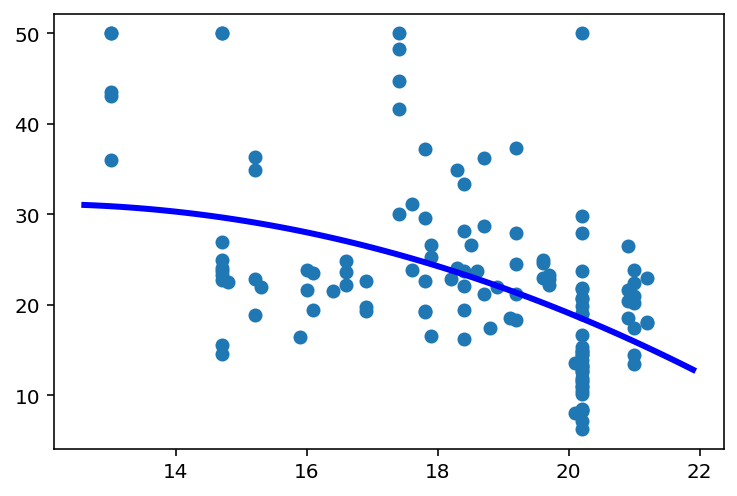

MSE = 74.07
R^2 = 0.2523
	B


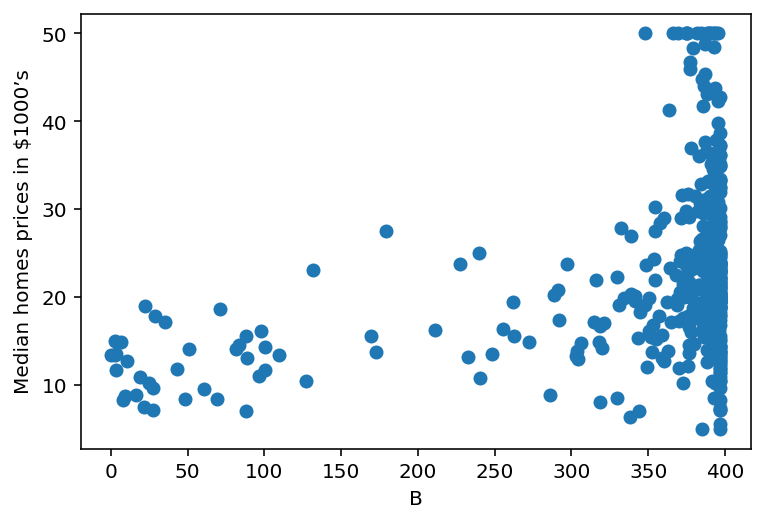

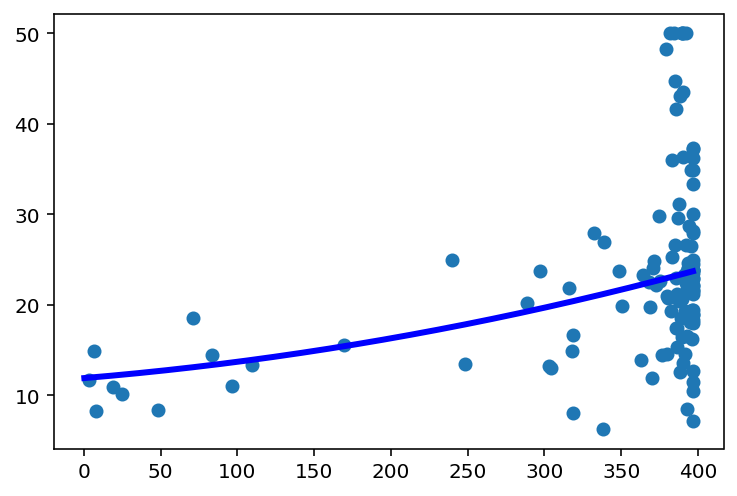

MSE = 86.41
R^2 = 0.1276
	LSTAT


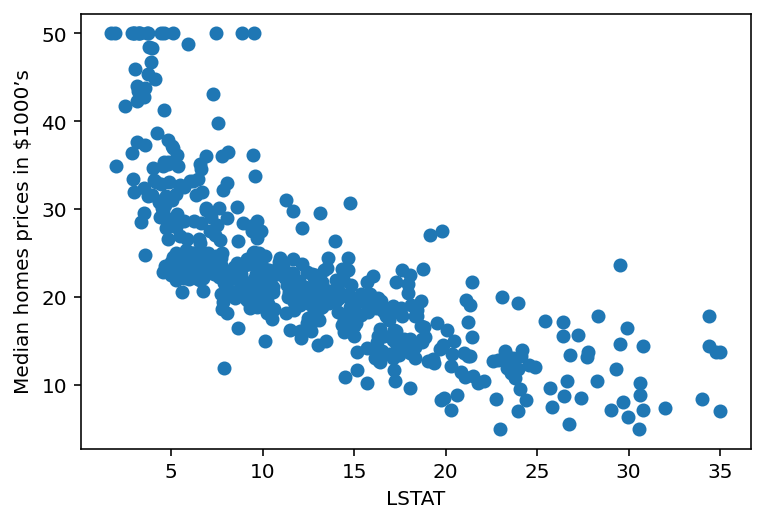

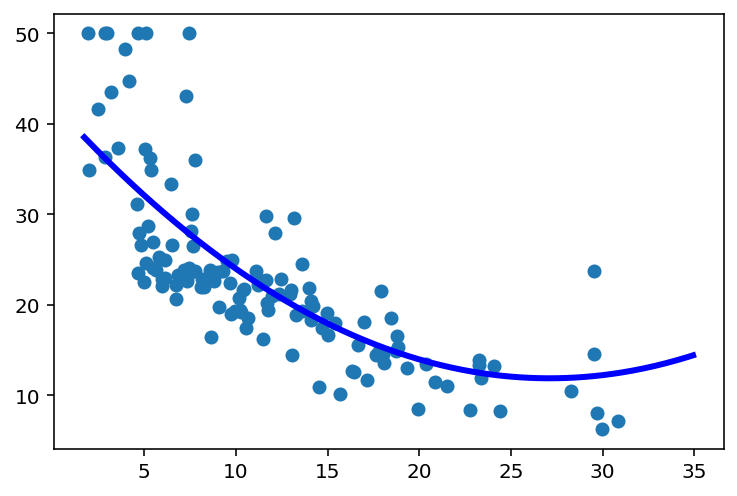

MSE = 35.88
R^2 = 0.6377


In [28]:
from scipy import stats
removeOutlier = lambda x: 40 if x>40 else x
ys = boston.target
mse_list=[]
r2_list=[]
for i in range(13):
    print("\t"+boston.feature_names[i])
    #remove outlire 
    xs_1d = boston.data[:, i].reshape(-1, 1)
    if (boston.feature_names[i]=="LSTAT"):
        for j in range(len(xs_1d)):
            if xs_1d[j][0]>35 :
                xs_1d[j][0]=35     
        
    

    plt.scatter(xs_1d[:, -1], ys)
    plt.xlabel(boston.feature_names[i])
    plt.ylabel("Median homes prices in $1000’s")
    plt.show()
    #training data
    xs_train, xs_test, ys_train, ys_test = train_test_split(
    xs_1d, ys, random_state=1)
    xs_train_b = apply_poly_basis(xs_train, deg=DEG)
    xs_test_b = apply_poly_basis(xs_test, deg=DEG)
    # 2. Instantiaiton
    model_b = LinearRegression()

    # 3.  Apprentissage (fit) du model
    model_b.fit(xs_train_b, ys_train)

    # 4. predict on new data
    ys_pred_b = model_b.predict(xs_test_b)

    plot_regression_line(xs_train_b, model=model_b, hop=HOP, deg=DEG)
    plt.scatter(xs_test_b[:, 0], ys_test)
    plt.show()

    mse = mean_squared_error(ys_test, ys_pred_b)
    r2 = r2_score(ys_test, ys_pred_b)

    print(f"MSE = {mse:.2f}")
    print(f"R^2 = {r2:.4f}")
    mse_list.append(mse)
    r2_list.append(r2)


In [29]:
for i in range(13):
    if (mse_list[i]<50):
        print(" chosen ")
    print("mse(" + boston.feature_names[i]+") = "+str(mse_list[i]))

mse(CRIM) = 79.11009845214922
mse(ZN) = 89.37517893601762
mse(INDUS) = 77.18013378852527
mse(CHAS) = 96.21078379913628
mse(NOX) = 89.32312323160855
 chosen 
mse(RM) = 32.120616846298404
mse(AGE) = 93.37393244125423
mse(DIS) = 96.18689159578993
mse(RAD) = 82.73107171940532
mse(TAX) = 74.06459009713555
mse(PTRATIO) = 74.067485575816
mse(B) = 86.41498365820014
 chosen 
mse(LSTAT) = 35.88394930655197


In [30]:
for i in range(13):
    if (r2_list[i]>0.6):
        print(" chosen ")
    print("mse(" + boston.feature_names[i]+") = "+str(r2_list[i]))

mse(CRIM) = 0.2013797950695242
mse(ZN) = 0.09775331956193256
mse(INDUS) = 0.22086288010327892
mse(CHAS) = 0.028747563490101102
mse(NOX) = 0.0982788243727768
 chosen 
mse(RM) = 0.6757408458567375
mse(AGE) = 0.05738571281764138
mse(DIS) = 0.028988756418766637
mse(RAD) = 0.1648258977880921
mse(TAX) = 0.2523144417871832
mse(PTRATIO) = 0.25228521179224717
mse(B) = 0.1276366316252434
 chosen 
mse(LSTAT) = 0.6377498257539486


In [31]:
def removeOutlierArray(an_array):
    mean = np.mean(an_array)

    standard_deviation = np.std(an_array)

    distance_from_mean = abs(an_array - mean)

    max_deviations = 2

    not_outlier = distance_from_mean < max_deviations * standard_deviation
    no_outliers = an_array[not_outlier]
    return no_outliers


#testing 
an_array = np.array([1, 45, 35, 20, 10, 40, 70])

removeOutlierArray( boston.data[:,12]).shape
boston.data[:,12].shape

(506,)

on constate que RM et LSTAT sont les deux features ayant la prediction la plus précise

In [38]:
boston.data.shape

boston.data.shape
xss = np.zeros((506,6))
xss[:,0]= boston.data[:,12] * boston.data[:,12]
xss[:,1]= boston.data[:,5] * boston.data[:,5]
xss[:,2]= boston.data[:,9] 
xss[:,3]= boston.data[:,10] 
xss[:,4]= boston.data[:,2] 
xss[:,5]= boston.data[:,0] 

# xss[:,0]= removeOutlierArray(boston.data[:,12])
# xss[:,1]= removeOutlierArray(boston.data[:,5])
# xss[:,2]= removeOutlierArray(boston.data[:,9])
# xss[:,3]= removeOutlierArray(boston.data[:,10])
# xss[:,4]= removeOutlierArray(boston.data[:,2])
# xss[:,5]= removeOutlierArray(boston.data[:,0])

xss


array([[2.4800400e+01, 4.3230625e+01, 2.9600000e+02, 1.5300000e+01,
        2.3100000e+00, 6.3200000e-03],
       [8.3539600e+01, 4.1229241e+01, 2.4200000e+02, 1.7800000e+01,
        7.0700000e+00, 2.7310000e-02],
       [1.6240900e+01, 5.1624225e+01, 2.4200000e+02, 1.7800000e+01,
        7.0700000e+00, 2.7290000e-02],
       ...,
       [3.1809600e+01, 4.8664576e+01, 2.7300000e+02, 2.1000000e+01,
        1.1930000e+01, 6.0760000e-02],
       [4.1990400e+01, 4.6158436e+01, 2.7300000e+02, 2.1000000e+01,
        1.1930000e+01, 1.0959000e-01],
       [6.2094400e+01, 3.6360900e+01, 2.7300000e+02, 2.1000000e+01,
        1.1930000e+01, 4.7410000e-02]])

on le teste avec les variable combinées 

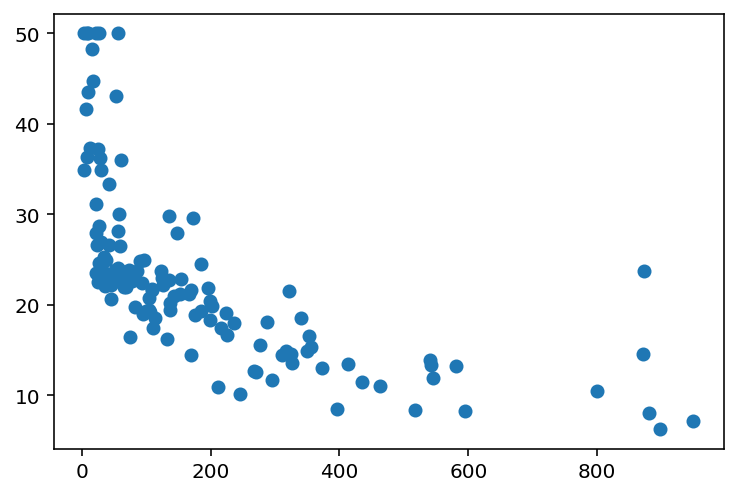

MSE = 16.22
R^2 = 0.8363


In [39]:

ys = boston.target
# xs = boston.data
xs = xss

#training data
xs_train, xs_test, ys_train, ys_test = train_test_split(xs, ys, random_state=1)
xs_train_b = apply_poly_basis(xs_train, deg=DEG)
xs_test_b = apply_poly_basis(xs_test, deg=DEG)
# 2. Instantiaiton
model_b = LinearRegression()

# 3.  Apprentissage (fit) du model
model_b.fit(xs_train_b, ys_train)

# 4. predict on new data
ys_pred_b = model_b.predict(xs_test_b)

#plot_regression_line(xs_train_b, model=model_b, hop=HOP, deg=DEG)

plt.scatter(xs_test_b[:, 0], ys_test)
plt.show()

mse = mean_squared_error(ys_test, ys_pred_b)
r2 = r2_score(ys_test, ys_pred_b)

print(f"MSE = {mse:.2f}")
print(f"R^2 = {r2:.4f}")



remove outliers

In [34]:
xs = np.array([1,9,6,45])




In [35]:
no= removeOutlierArray( boston.data[:,0])
no

array([6.32000e-03, 2.73100e-02, 2.72900e-02, 3.23700e-02, 6.90500e-02,
       2.98500e-02, 8.82900e-02, 1.44550e-01, 2.11240e-01, 1.70040e-01,
       2.24890e-01, 1.17470e-01, 9.37800e-02, 6.29760e-01, 6.37960e-01,
       6.27390e-01, 1.05393e+00, 7.84200e-01, 8.02710e-01, 7.25800e-01,
       1.25179e+00, 8.52040e-01, 1.23247e+00, 9.88430e-01, 7.50260e-01,
       8.40540e-01, 6.71910e-01, 9.55770e-01, 7.72990e-01, 1.00245e+00,
       1.13081e+00, 1.35472e+00, 1.38799e+00, 1.15172e+00, 1.61282e+00,
       6.41700e-02, 9.74400e-02, 8.01400e-02, 1.75050e-01, 2.76300e-02,
       3.35900e-02, 1.27440e-01, 1.41500e-01, 1.59360e-01, 1.22690e-01,
       1.71420e-01, 1.88360e-01, 2.29270e-01, 2.53870e-01, 2.19770e-01,
       8.87300e-02, 4.33700e-02, 5.36000e-02, 4.98100e-02, 1.36000e-02,
       1.31100e-02, 2.05500e-02, 1.43200e-02, 1.54450e-01, 1.03280e-01,
       1.49320e-01, 1.71710e-01, 1.10270e-01, 1.26500e-01, 1.95100e-02,
       3.58400e-02, 4.37900e-02, 5.78900e-02, 1.35540e-01, 1.281

---